# Herschel Stripe 82 master catalogue
## Checks and diagnostics

In [20]:
from herschelhelp_internal import git_version
print("This notebook was run with herschelhelp_internal version: \n{}".format(git_version()))

This notebook was run with herschelhelp_internal version: 
33f5ec7 (Wed Dec 6 16:56:17 2017 +0000)


In [21]:
%matplotlib inline
#%config InlineBackend.figure_format = 'svg'

import matplotlib.pyplot as plt
plt.rc('figure', figsize=(10, 6))
plt.style.use('ggplot')

import locale
locale.setlocale(locale.LC_ALL, 'en_GB')

import os
import time
import itertools


from astropy.coordinates import SkyCoord
from astropy.table import Table
from astropy import units as u
import numpy as np
from matplotlib_venn import venn3

from herschelhelp_internal.masterlist import nb_compare_mags, nb_ccplots, find_last_ml_suffix, quick_checks

In [23]:
OUT_DIR = os.environ.get('OUT_DIR', "./data")
SUFFIX = find_last_ml_suffix()
#SUFFIX = "20170627"

master_catalogue_filename = "master_catalogue_herschel-stripe-82_{}.fits".format(SUFFIX)
master_catalogue = Table.read("{}/{}".format(OUT_DIR, master_catalogue_filename))

print("Diagnostics done using: {}".format(master_catalogue_filename))

Diagnostics done using: master_catalogue_herschel-stripe-82_20171206.fits


## 0 - Quick checks

In [24]:
quick_checks(master_catalogue).show_in_notebook()

Table shows only problematic columns.


## I - Summary of wavelength domains

In [25]:
flag_obs = master_catalogue['flag_optnir_obs']
flag_det = master_catalogue['flag_optnir_det']

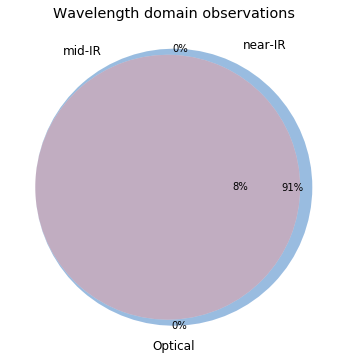

In [26]:
venn3(
    [
        np.sum(flag_obs == 4),
        np.sum(flag_obs == 2),
        np.sum(flag_obs == 6),
        np.sum(flag_obs == 1),
        np.sum(flag_obs == 5),
        np.sum(flag_obs == 3),
        np.sum(flag_obs == 7)
    ],
    set_labels=('mid-IR', 'near-IR', 'Optical'),
    subset_label_formatter=lambda x: "{}%".format(int(100*x/len(flag_obs)))
)
plt.title("Wavelength domain observations");

/Users/rs548/anaconda/envs/herschelhelp_internal/lib/python3.6/site-packages/matplotlib_venn/_venn3.py:53: UserWarning: Circle A has zero area
  warnings.warn("Circle A has zero area")
/Users/rs548/anaconda/envs/herschelhelp_internal/lib/python3.6/site-packages/matplotlib_venn/_venn3.py:57: UserWarning: Circle B has zero area
  warnings.warn("Circle B has zero area")


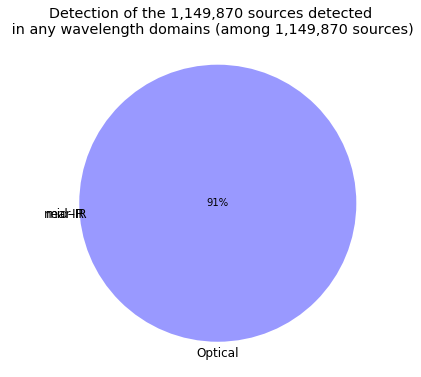

In [27]:
venn3(
    [
        np.sum(flag_det[flag_obs == 7] == 4),
        np.sum(flag_det[flag_obs == 7] == 2),
        np.sum(flag_det[flag_obs == 7] == 6),
        np.sum(flag_det[flag_obs == 7] == 1),
        np.sum(flag_det[flag_obs == 7] == 5),
        np.sum(flag_det[flag_obs == 7] == 3),
        np.sum(flag_det[flag_obs == 7] == 7)
    ],
    set_labels=('mid-IR', 'near-IR', 'Optical'),
    subset_label_formatter=lambda x: "{}%".format(int(100*x/np.sum(flag_det != 0)))
)
plt.title("Detection of the {} sources detected\n in any wavelength domains "
          "(among {} sources)".format(
              locale.format('%d', np.sum(flag_det != 0), grouping=True),
              locale.format('%d', len(flag_det), grouping=True)));

## II - Comparing magnitudes in similar filters

The master list if composed of several catalogues containing magnitudes in similar filters on different instruments. We are comparing the magnitudes in these corresponding filters.

In [28]:
u_bands = [ "SDSS u"]
g_bands = [ "SDSS g", "DECam g" ,"GPC1 g", "Suprime g", "RCS g"]
r_bands = [ "SDSS r", "DECam r" ,"GPC1 r", "Suprime r", "RCS r"]
i_bands = [ "SDSS i"            ,"GPC1 i", "Suprime i", "RCS i"]
z_bands = [ "SDSS z", "DECam z" ,"GPC1 z", "Suprime z", "RCS z"]
y_bands = [                      "GPC1 y", "Suprime y", "RCS y", "VHS Y", "UKIDSS Y"] #This will compare lower case y to upper case Y
J_bands = [                                                      "VHS J", "UKIDSS J", "VICS82 J"]
H_bands = [                                                      "VHS H", "UKIDSS H"]
K_bands = [                                                      "VHS K", "UKIDSS K", "VICS82 K"]

DECam g (aperture) - SDSS g (aperture):
- Median: -0.48
- Median Absolute Deviation: 0.17
- 1% percentile: -1.7676583099365235
- 99% percentile: 1.3928214454650838


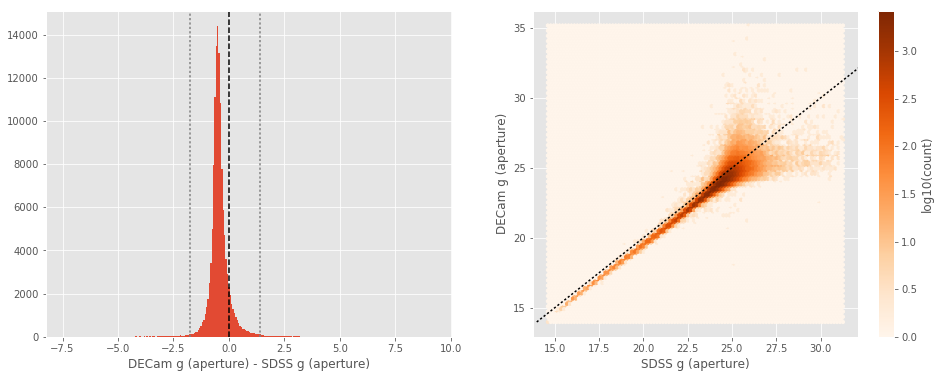

DECam g (total) - SDSS g (total):
- Median: -0.04
- Median Absolute Deviation: 0.25
- 1% percentile: -6.7676544189453125
- 99% percentile: 2.0096796989441015


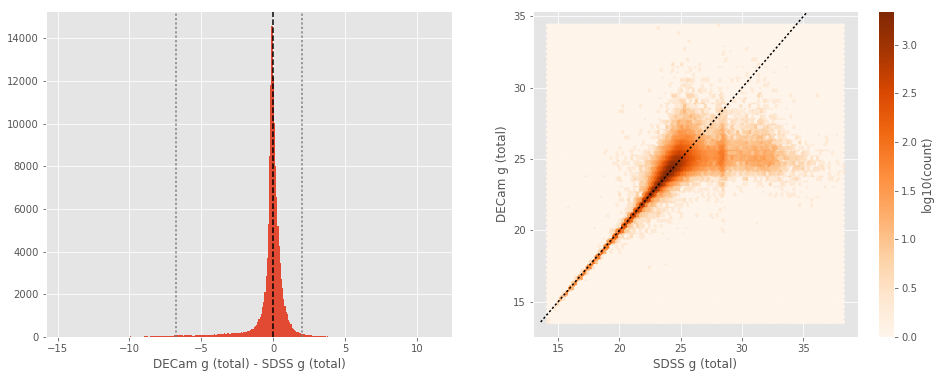

GPC1 g (aperture) - SDSS g (aperture):
- Median: -0.66
- Median Absolute Deviation: 0.30
- 1% percentile: -3.6521934509277343
- 99% percentile: 1.5850301361083987


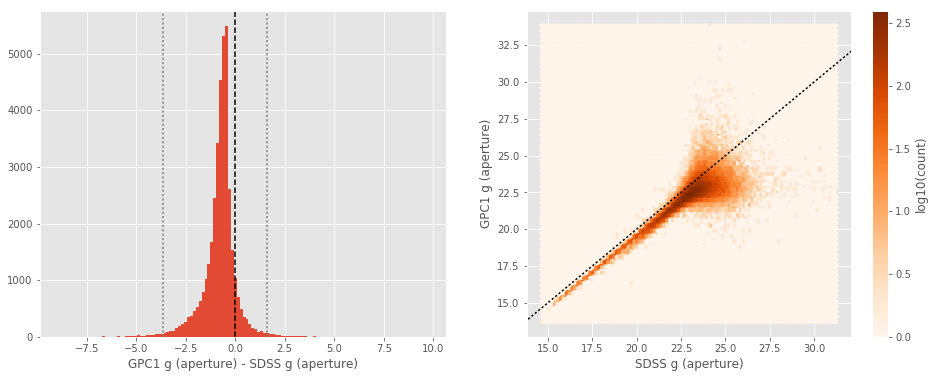

GPC1 g (total) - SDSS g (total):
- Median: -0.16
- Median Absolute Deviation: 0.31
- 1% percentile: -7.077886543273926
- 99% percentile: 1.5497752571105943


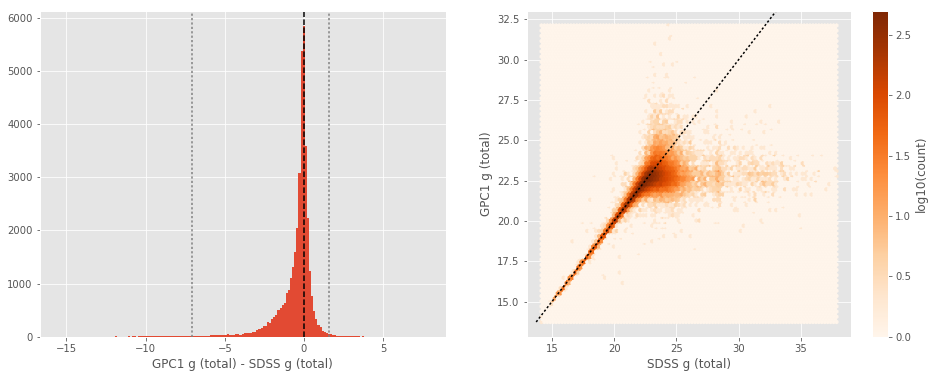

No sources have both SDSS g (aperture) and Suprime g (aperture) values.
No sources have both SDSS g (total) and Suprime g (total) values.
No sources have both SDSS g (aperture) and RCS g (aperture) values.
No sources have both SDSS g (total) and RCS g (total) values.
GPC1 g (aperture) - DECam g (aperture):
- Median: -0.12
- Median Absolute Deviation: 0.27
- 1% percentile: -3.234998321533203
- 99% percentile: 2.0078713226318308


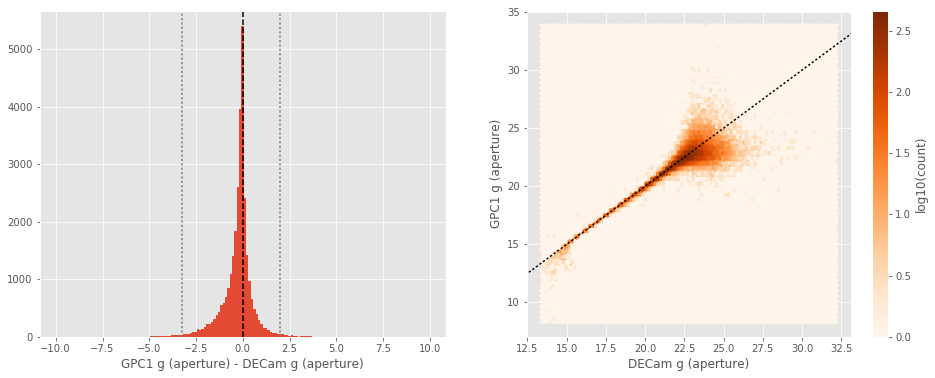

GPC1 g (total) - DECam g (total):
- Median: -0.04
- Median Absolute Deviation: 0.28
- 1% percentile: -3.6796262741088865
- 99% percentile: 1.5877310752868645


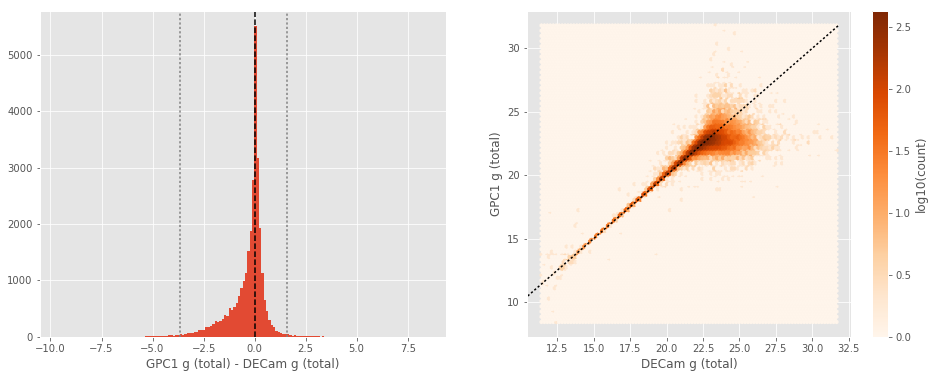

No sources have both DECam g (aperture) and Suprime g (aperture) values.
No sources have both DECam g (total) and Suprime g (total) values.
No sources have both DECam g (aperture) and RCS g (aperture) values.
No sources have both DECam g (total) and RCS g (total) values.
Suprime g (aperture) - GPC1 g (aperture):
- Median: 0.26
- Median Absolute Deviation: 0.31
- 1% percentile: -2.141099700927734
- 99% percentile: 3.0090626144409174


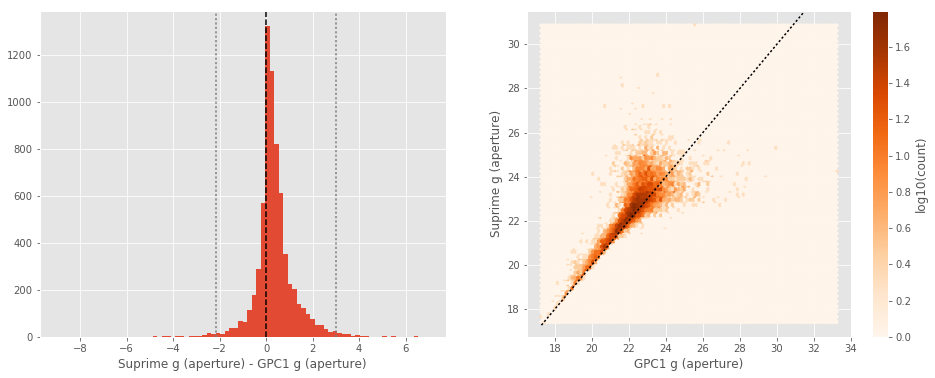

Suprime g (total) - GPC1 g (total):
- Median: 0.15
- Median Absolute Deviation: 0.31
- 1% percentile: -1.6229734420776367
- 99% percentile: 3.339307212829593


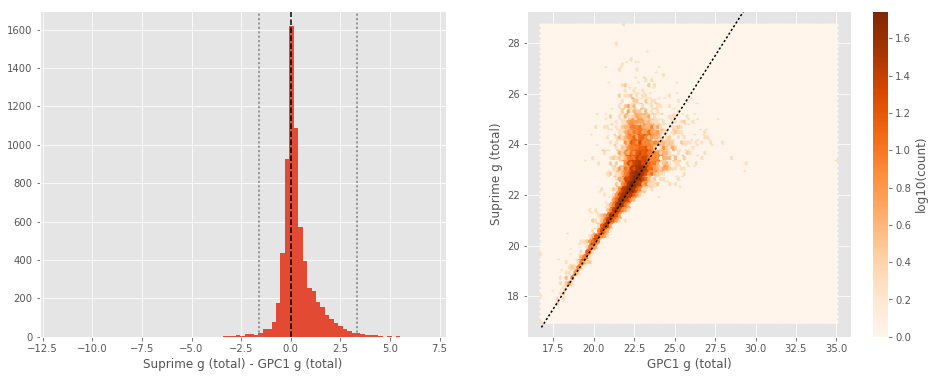

No sources have both GPC1 g (aperture) and RCS g (aperture) values.
No sources have both GPC1 g (total) and RCS g (total) values.
No sources have both Suprime g (aperture) and RCS g (aperture) values.
No sources have both Suprime g (total) and RCS g (total) values.
DECam r (aperture) - SDSS r (aperture):
- Median: -0.55
- Median Absolute Deviation: 0.16
- 1% percentile: -1.2381673431396485
- 99% percentile: 1.2418018722534199


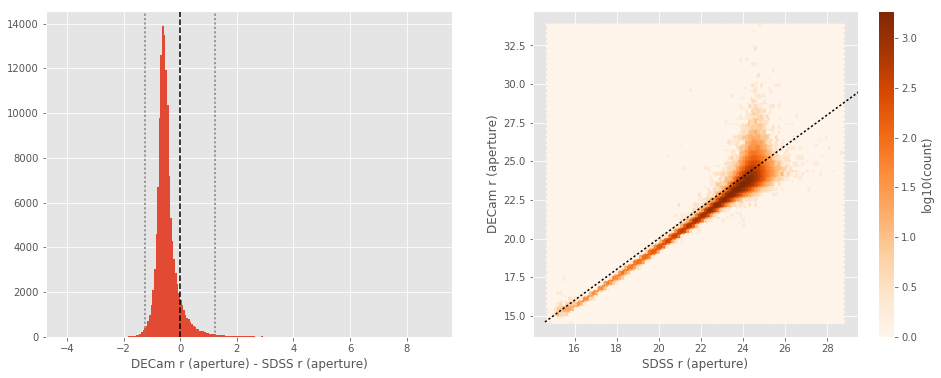

DECam r (total) - SDSS r (total):
- Median: -0.17
- Median Absolute Deviation: 0.19
- 1% percentile: -5.339282684326172
- 99% percentile: 1.29418106079101


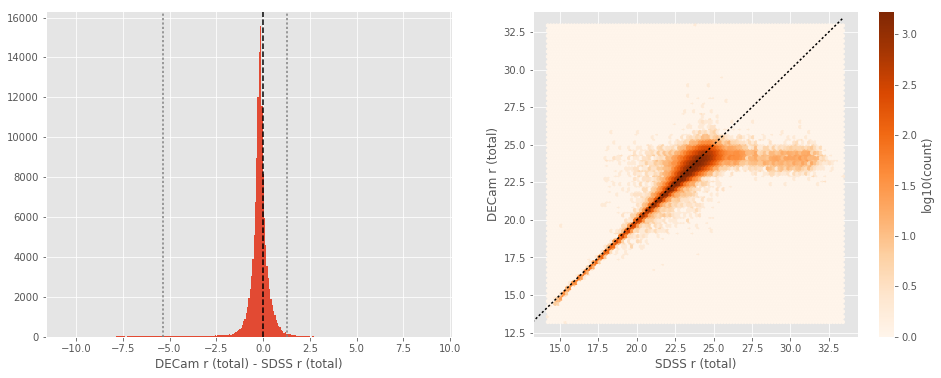

GPC1 r (aperture) - SDSS r (aperture):
- Median: -0.44
- Median Absolute Deviation: 0.17
- 1% percentile: -1.6866246795654296
- 99% percentile: 0.930186614990236


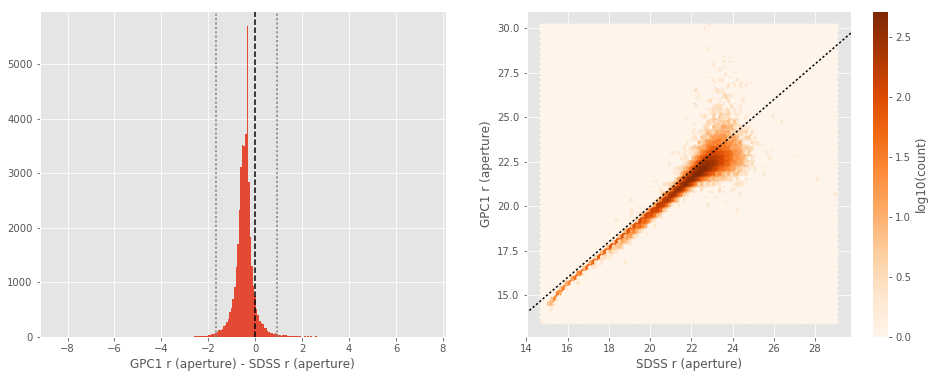

GPC1 r (total) - SDSS r (total):
- Median: 0.08
- Median Absolute Deviation: 0.15
- 1% percentile: -1.7409143447875977
- 99% percentile: 1.0960084915161141


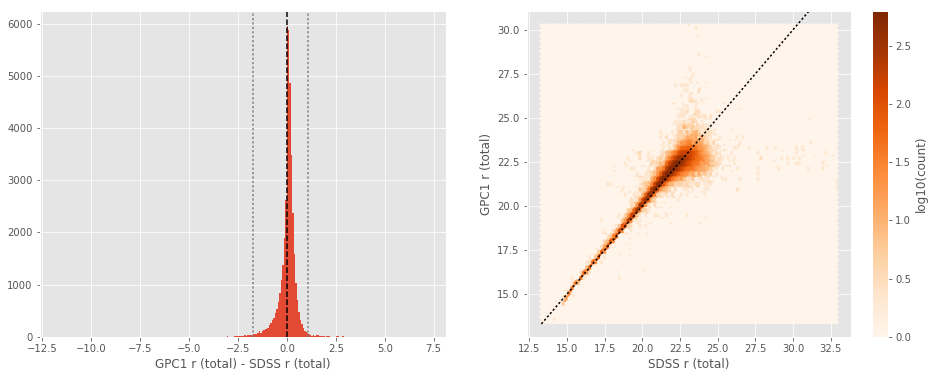

No sources have both SDSS r (aperture) and Suprime r (aperture) values.
No sources have both SDSS r (total) and Suprime r (total) values.
No sources have both SDSS r (aperture) and RCS r (aperture) values.
No sources have both SDSS r (total) and RCS r (total) values.
GPC1 r (aperture) - DECam r (aperture):
- Median: 0.13
- Median Absolute Deviation: 0.15
- 1% percentile: -1.5506977081298827
- 99% percentile: 1.4787097930908217


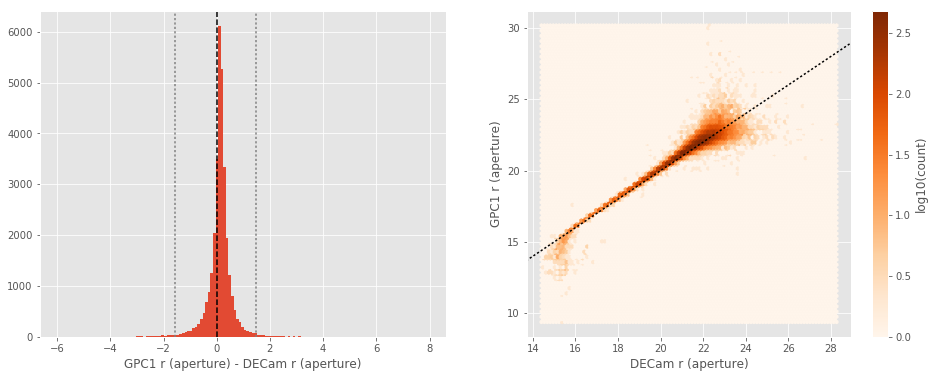

GPC1 r (total) - DECam r (total):
- Median: 0.24
- Median Absolute Deviation: 0.15
- 1% percentile: -1.4401713180541993
- 99% percentile: 1.3792019653320313


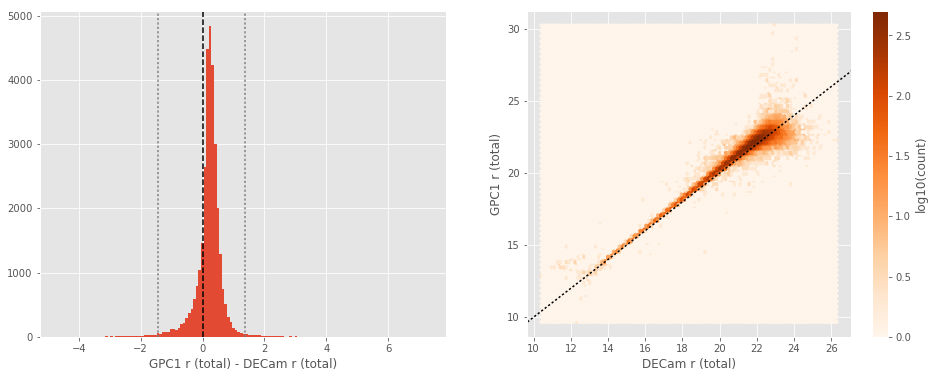

No sources have both DECam r (aperture) and Suprime r (aperture) values.
No sources have both DECam r (total) and Suprime r (total) values.
No sources have both DECam r (aperture) and RCS r (aperture) values.
No sources have both DECam r (total) and RCS r (total) values.
Suprime r (aperture) - GPC1 r (aperture):
- Median: 0.10
- Median Absolute Deviation: 0.18
- 1% percentile: -1.3842623519897461
- 99% percentile: 1.8020347213745103


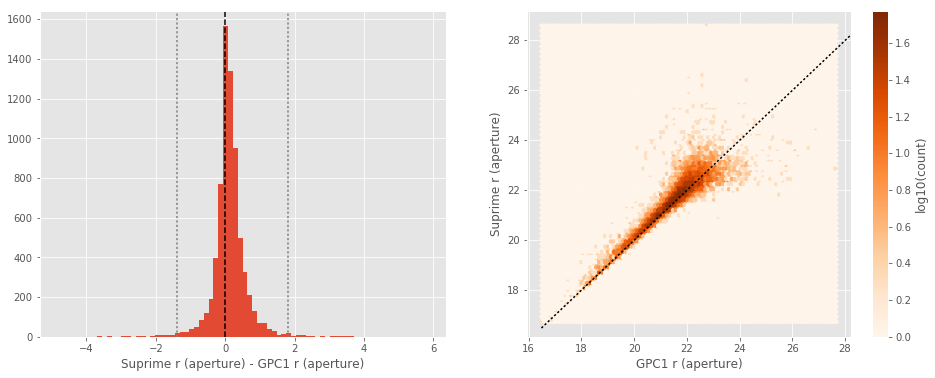

Suprime r (total) - GPC1 r (total):
- Median: -0.07
- Median Absolute Deviation: 0.18
- 1% percentile: -1.0101588439941407
- 99% percentile: 1.997136306762695


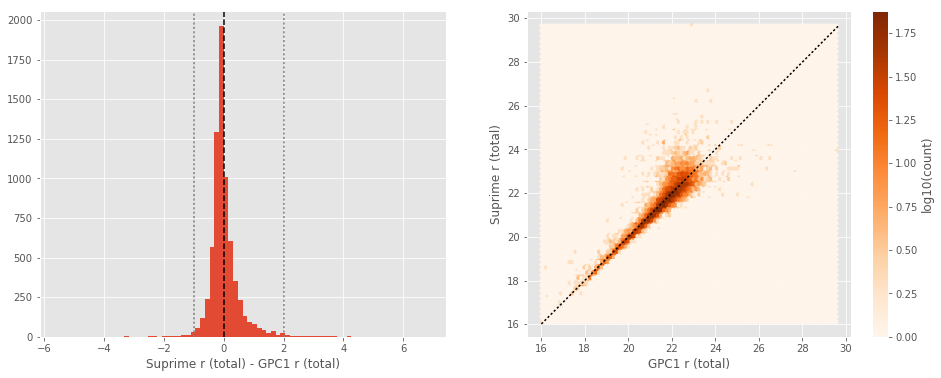

No sources have both GPC1 r (aperture) and RCS r (aperture) values.
No sources have both GPC1 r (total) and RCS r (total) values.
No sources have both Suprime r (aperture) and RCS r (aperture) values.
No sources have both Suprime r (total) and RCS r (total) values.
GPC1 i (aperture) - SDSS i (aperture):
- Median: -0.40
- Median Absolute Deviation: 0.09
- 1% percentile: -0.9924972915649415
- 99% percentile: 0.2606700134277342


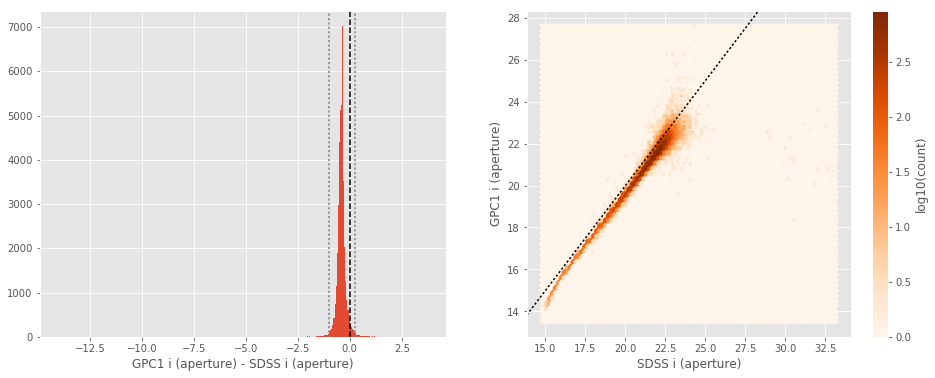

GPC1 i (total) - SDSS i (total):
- Median: 0.08
- Median Absolute Deviation: 0.10
- 1% percentile: -1.4122674560546875
- 99% percentile: 0.964023246765136


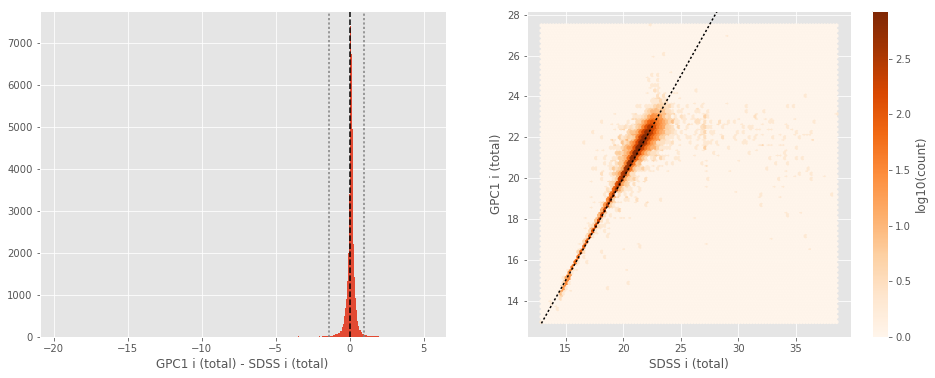

No sources have both SDSS i (aperture) and Suprime i (aperture) values.
No sources have both SDSS i (total) and Suprime i (total) values.
No sources have both SDSS i (aperture) and RCS i (aperture) values.
No sources have both SDSS i (total) and RCS i (total) values.
Suprime i (aperture) - GPC1 i (aperture):
- Median: -0.00
- Median Absolute Deviation: 0.12
- 1% percentile: -0.723801555633545
- 99% percentile: 1.1959865570068362


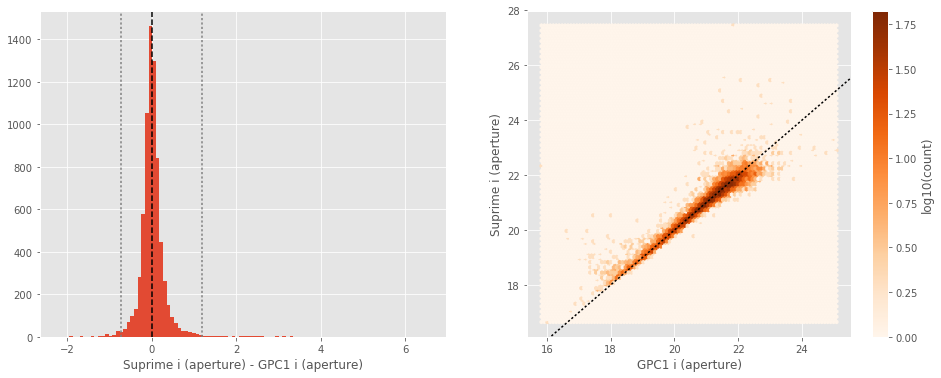

Suprime i (total) - GPC1 i (total):
- Median: -0.19
- Median Absolute Deviation: 0.11
- 1% percentile: -0.7225614166259766
- 99% percentile: 1.2767703247070326


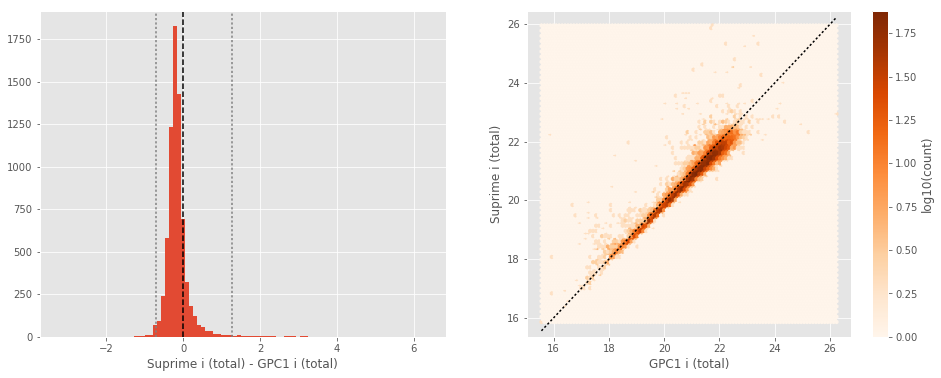

No sources have both GPC1 i (aperture) and RCS i (aperture) values.
No sources have both GPC1 i (total) and RCS i (total) values.
No sources have both Suprime i (aperture) and RCS i (aperture) values.
No sources have both Suprime i (total) and RCS i (total) values.
DECam z (aperture) - SDSS z (aperture):
- Median: -0.48
- Median Absolute Deviation: 0.21
- 1% percentile: -4.073816795349121
- 99% percentile: 1.6963096618652356


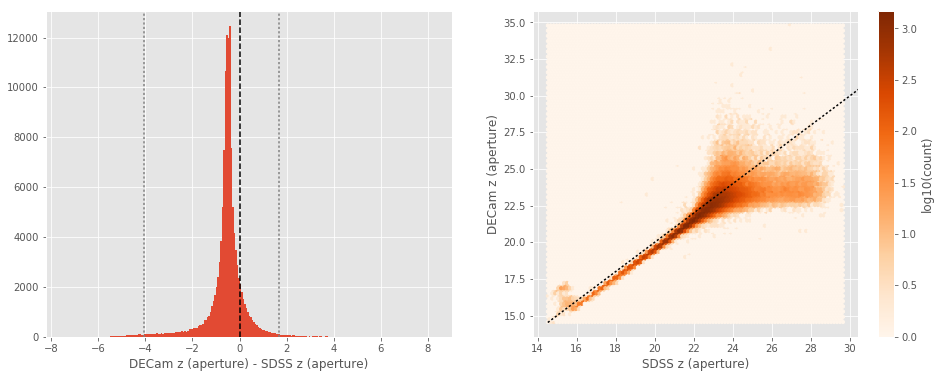

DECam z (total) - SDSS z (total):
- Median: -0.19
- Median Absolute Deviation: 0.44
- 1% percentile: -8.50911277770996
- 99% percentile: 1.8685677337646507


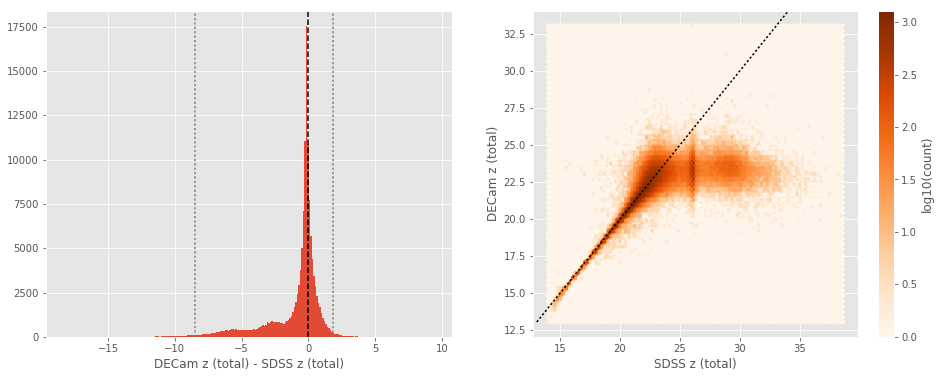

GPC1 z (aperture) - SDSS z (aperture):
- Median: -0.37
- Median Absolute Deviation: 0.17
- 1% percentile: -1.608293914794922
- 99% percentile: 1.1307159423828075


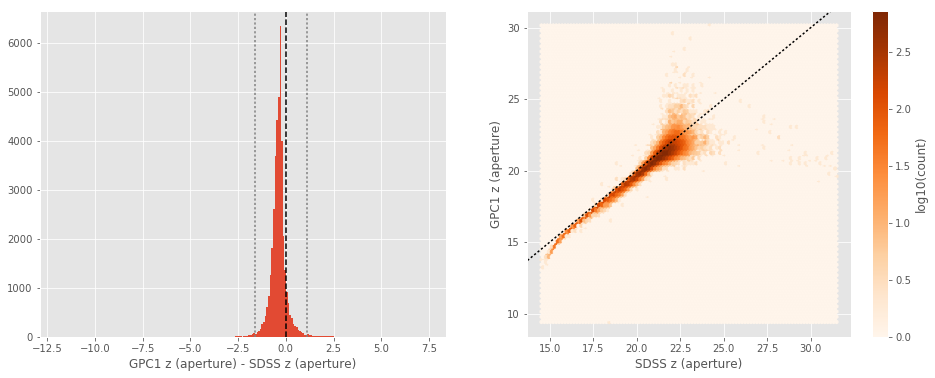

GPC1 z (total) - SDSS z (total):
- Median: 0.13
- Median Absolute Deviation: 0.17
- 1% percentile: -5.372372512817382
- 99% percentile: 1.2189147186279208


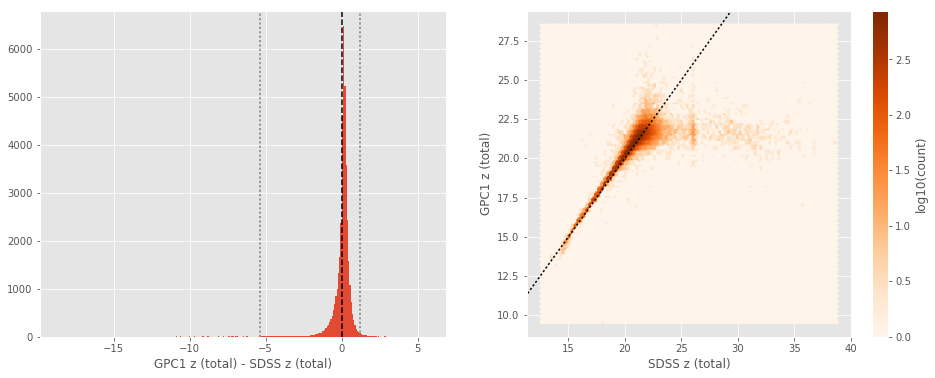

No sources have both SDSS z (aperture) and Suprime z (aperture) values.
No sources have both SDSS z (total) and Suprime z (total) values.
No sources have both SDSS z (aperture) and RCS z (aperture) values.
No sources have both SDSS z (total) and RCS z (total) values.
GPC1 z (aperture) - DECam z (aperture):
- Median: 0.10
- Median Absolute Deviation: 0.15
- 1% percentile: -2.0438600540161134
- 99% percentile: 1.5553242492675778


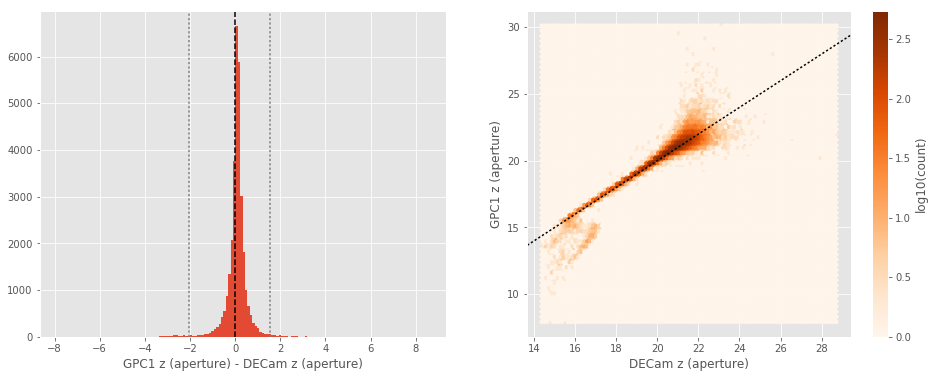

GPC1 z (total) - DECam z (total):
- Median: 0.27
- Median Absolute Deviation: 0.15
- 1% percentile: -1.1057234191894532
- 99% percentile: 1.4049589538574165


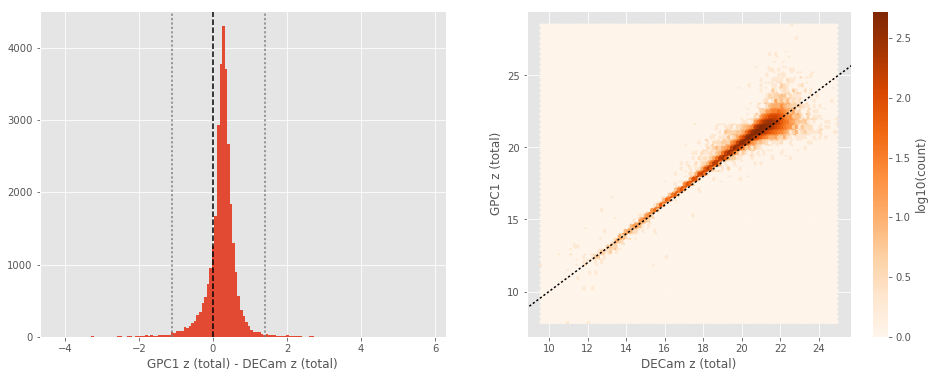

No sources have both DECam z (aperture) and Suprime z (aperture) values.
No sources have both DECam z (total) and Suprime z (total) values.
No sources have both DECam z (aperture) and RCS z (aperture) values.
No sources have both DECam z (total) and RCS z (total) values.
Suprime z (aperture) - GPC1 z (aperture):
- Median: -0.00
- Median Absolute Deviation: 0.16
- 1% percentile: -1.3736181259155273
- 99% percentile: 1.126847267150879


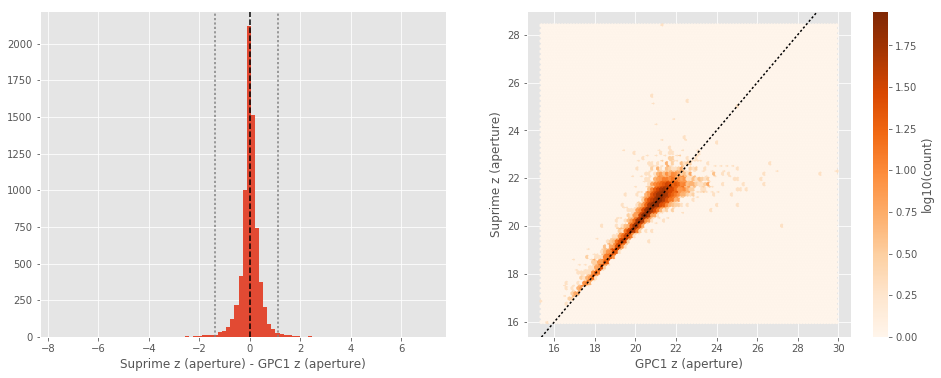

Suprime z (total) - GPC1 z (total):
- Median: -0.16
- Median Absolute Deviation: 0.15
- 1% percentile: -0.9496082305908202
- 99% percentile: 1.196050071716308


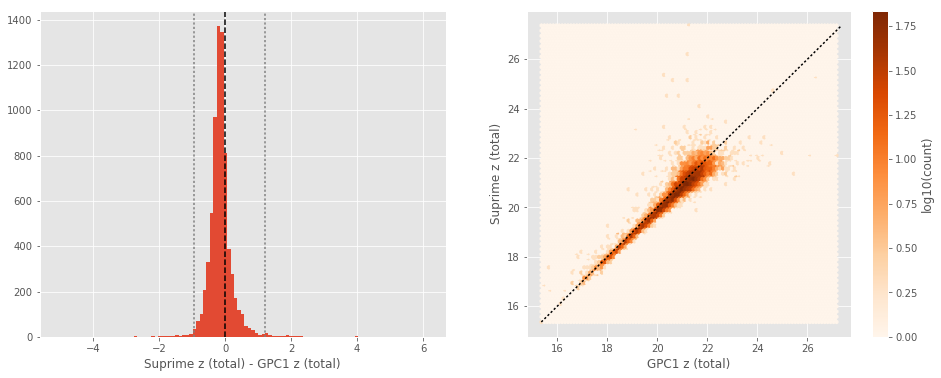

No sources have both GPC1 z (aperture) and RCS z (aperture) values.
No sources have both GPC1 z (total) and RCS z (total) values.
No sources have both Suprime z (aperture) and RCS z (aperture) values.
No sources have both Suprime z (total) and RCS z (total) values.
Suprime y (aperture) - GPC1 y (aperture):
- Median: 0.11
- Median Absolute Deviation: 0.25
- 1% percentile: -1.951801586151123
- 99% percentile: 1.8782656669616682


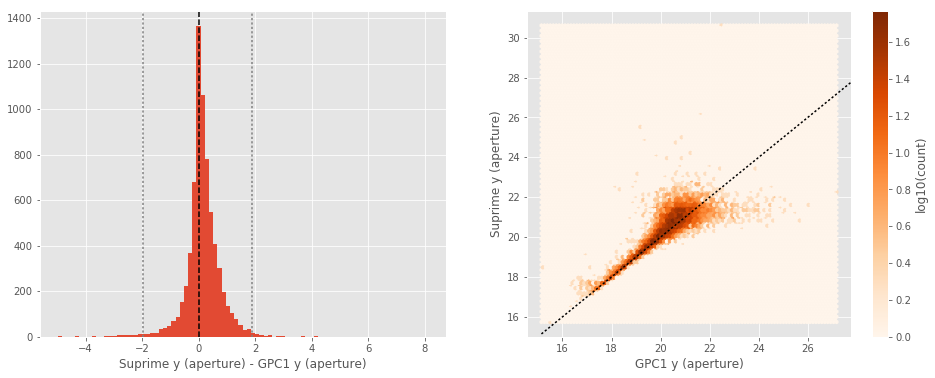

Suprime y (total) - GPC1 y (total):
- Median: -0.14
- Median Absolute Deviation: 0.27
- 1% percentile: -2.063558578491211
- 99% percentile: 2.0909240722656235


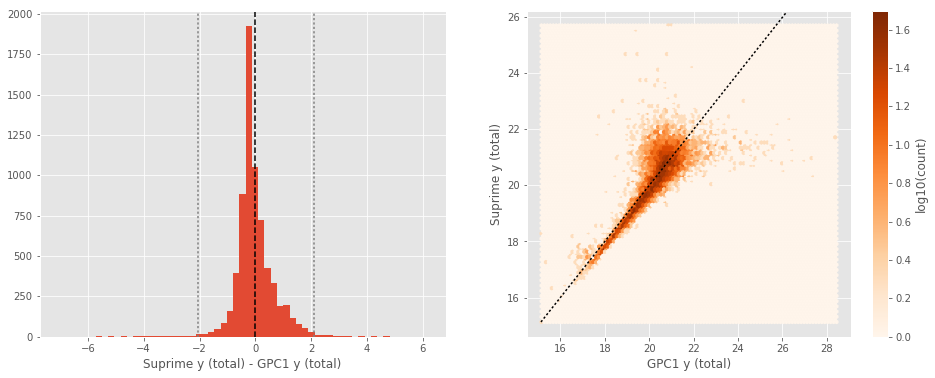

No sources have both GPC1 y (aperture) and RCS y (aperture) values.
No sources have both GPC1 y (total) and RCS y (total) values.
No sources have both GPC1 y (aperture) and VHS Y (aperture) values.
No sources have both GPC1 y (total) and VHS Y (total) values.
No sources have both GPC1 y (aperture) and UKIDSS Y (aperture) values.
No sources have both GPC1 y (total) and UKIDSS Y (total) values.
No sources have both Suprime y (aperture) and RCS y (aperture) values.
No sources have both Suprime y (total) and RCS y (total) values.
No sources have both Suprime y (aperture) and VHS Y (aperture) values.
No sources have both Suprime y (total) and VHS Y (total) values.
No sources have both Suprime y (aperture) and UKIDSS Y (aperture) values.
No sources have both Suprime y (total) and UKIDSS Y (total) values.
No sources have both RCS y (aperture) and VHS Y (aperture) values.
No sources have both RCS y (total) and VHS Y (total) values.
No sources have both RCS y (aperture) and UKIDSS Y (aperture) 

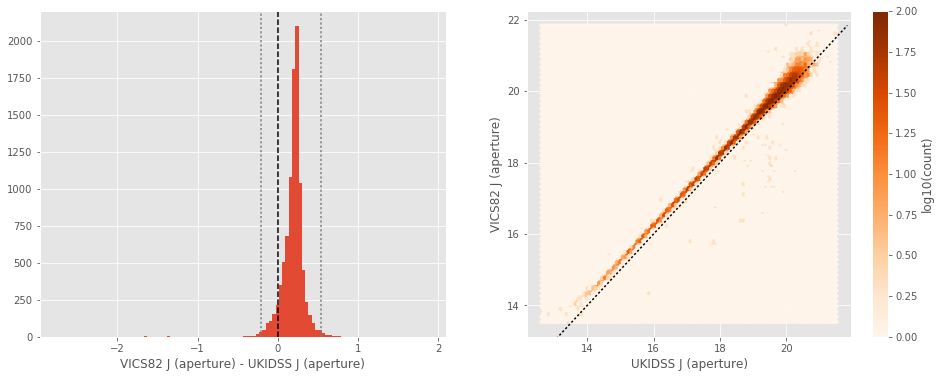

VICS82 J (total) - UKIDSS J (total):
- Median: -0.10
- Median Absolute Deviation: 0.11
- 1% percentile: -1.0588563537597655
- 99% percentile: 0.3203446197509763


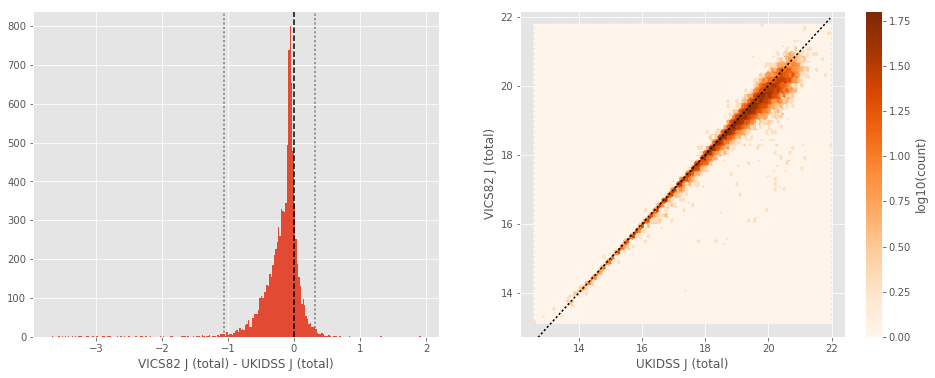

No sources have both VHS H (aperture) and UKIDSS H (aperture) values.
No sources have both VHS H (total) and UKIDSS H (total) values.
No sources have both VHS K (aperture) and UKIDSS K (aperture) values.
No sources have both VHS K (total) and UKIDSS K (total) values.
No sources have both VHS K (aperture) and VICS82 K (aperture) values.
No sources have both VHS K (total) and VICS82 K (total) values.
VICS82 K (aperture) - UKIDSS K (aperture):
- Median: 0.07
- Median Absolute Deviation: 0.08
- 1% percentile: -0.335560302734375
- 99% percentile: 0.6840035247802735


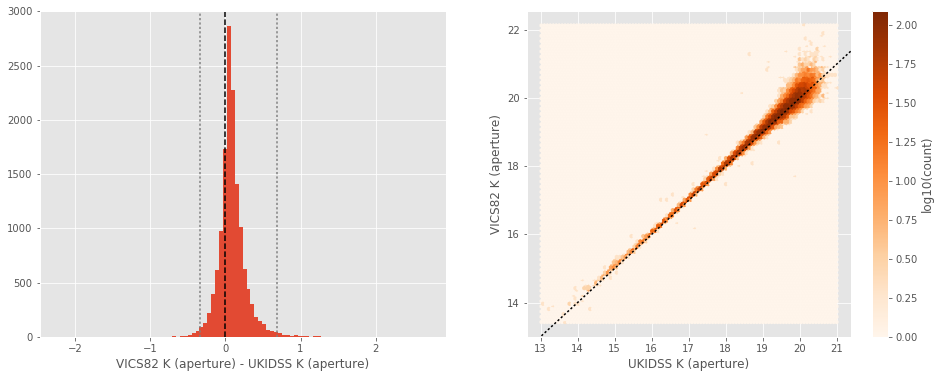

VICS82 K (total) - UKIDSS K (total):
- Median: -0.09
- Median Absolute Deviation: 0.14
- 1% percentile: -1.149030475616455
- 99% percentile: 0.8008978462219217


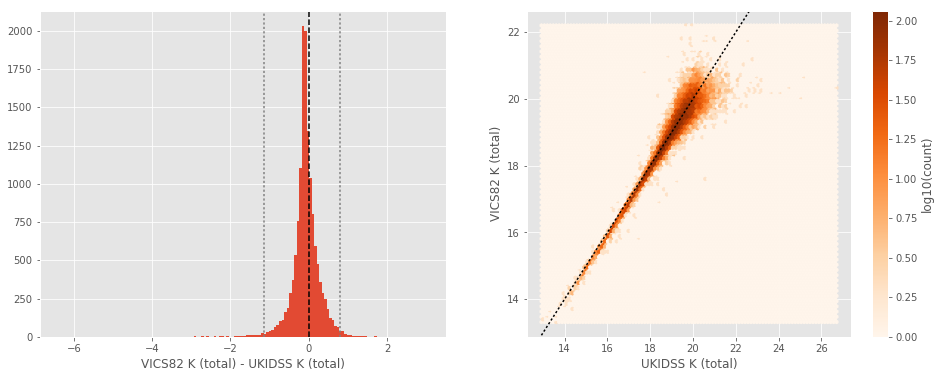

In [29]:
for band_of_a_kind in [u_bands, g_bands, r_bands, i_bands, z_bands, y_bands, J_bands, H_bands, K_bands]:
    for band1, band2 in itertools.combinations(band_of_a_kind, 2):
        
        basecol1, basecol2 = band1.replace(" ", "_").lower(), band2.replace(" ", "_").lower()
        
        col1, col2 = "m_ap_{}".format(basecol1), "m_ap_{}".format(basecol2)
        nb_compare_mags(master_catalogue[col1], master_catalogue[col2], 
                        labels=("{} (aperture)".format(band1), "{} (aperture)".format(band2)))
        
        col1, col2 = "m_{}".format(basecol1), "m_{}".format(basecol2)
        nb_compare_mags(master_catalogue[col1], master_catalogue[col2], 
                        labels=("{} (total)".format(band1), "{} (total)".format(band2)))

## III - Comparing magnitudes to reference bands

Cross-match the master list to SDSS and 2MASS to compare its magnitudes to SDSS and 2MASS ones.

In [30]:
master_catalogue_coords = SkyCoord(master_catalogue['ra'], master_catalogue['dec'])

### III.a - Comparing u, g, r, i, and z bands to SDSS

The catalogue is cross-matched to SDSS-DR13 withing 0.2 arcsecond. 

We compare the u, g, r, i, and z magnitudes to those from SDSS using `fiberMag` for the aperture magnitude and `petroMag`  for the total magnitude.

In [31]:
sdss = Table.read("../../dmu0/dmu0_SDSS-DR13/data/SDSS-DR13_Herschel-Stripe-82.fits")
sdss_coords = SkyCoord(sdss['ra'] * u.deg, sdss['dec'] * u.deg)

idx, d2d, _ = sdss_coords.match_to_catalog_sky(master_catalogue_coords)
mask = (d2d < 0.2 * u.arcsec)

sdss = sdss[mask]
ml_sdss_idx = idx[mask]

SDSS u (aperture) - SDSS u (fiberMag):
- Median: 0.50
- Median Absolute Deviation: 0.52
- 1% percentile: -1.1191215515136719
- 99% percentile: 5.353469848632807


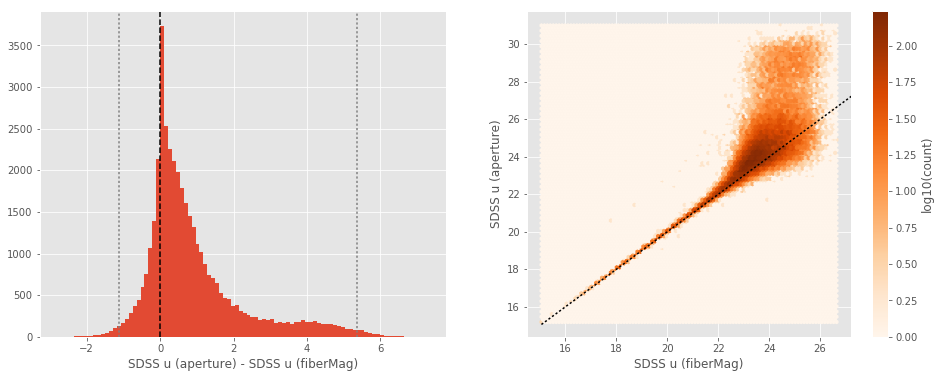

SDSS u (total) - SDSS u (petroMag):
- Median: 0.55
- Median Absolute Deviation: 0.96
- 1% percentile: -3.5498481750488278
- 99% percentile: 8.654589080810544


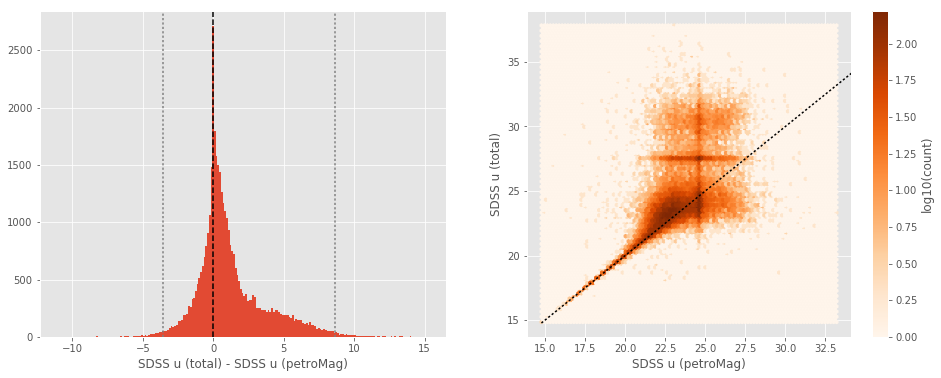

SDSS g (aperture) - SDSS g (fiberMag):
- Median: 0.06
- Median Absolute Deviation: 0.11
- 1% percentile: -0.6009922027587891
- 99% percentile: 1.700812835693354


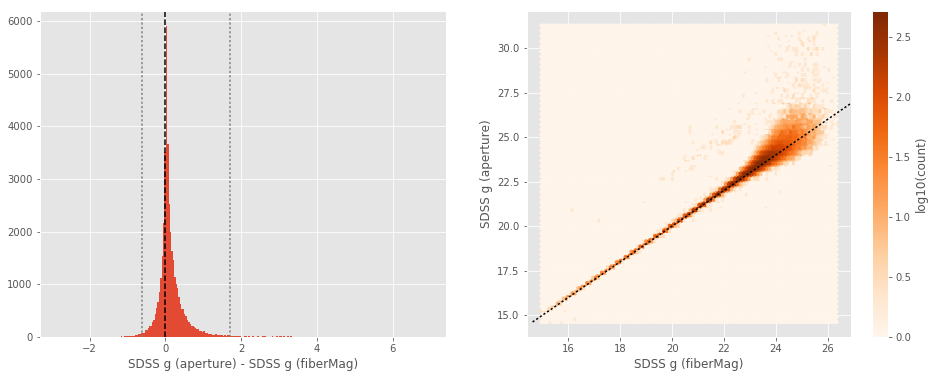

SDSS g (total) - SDSS g (petroMag):
- Median: 0.00
- Median Absolute Deviation: 0.24
- 1% percentile: -2.8106809234619137
- 99% percentile: 5.081926879882811


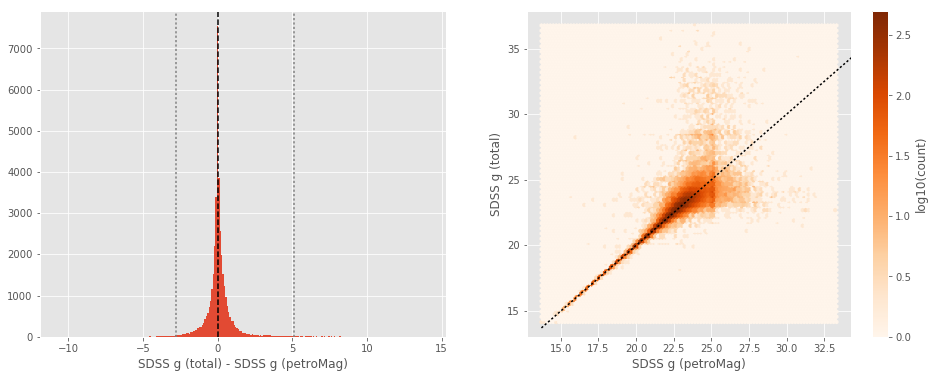

DECam g (aperture) - SDSS g (fiberMag):
- Median: -0.42
- Median Absolute Deviation: 0.17
- 1% percentile: -1.2564920425415038
- 99% percentile: 1.389486732482911


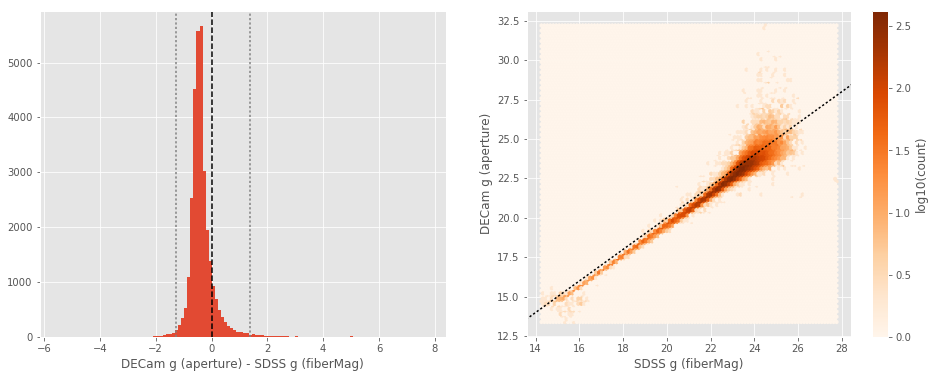

DECam g (total) - SDSS g (petroMag):
- Median: -0.08
- Median Absolute Deviation: 0.26
- 1% percentile: -3.15645881652832
- 99% percentile: 2.2978275299072224


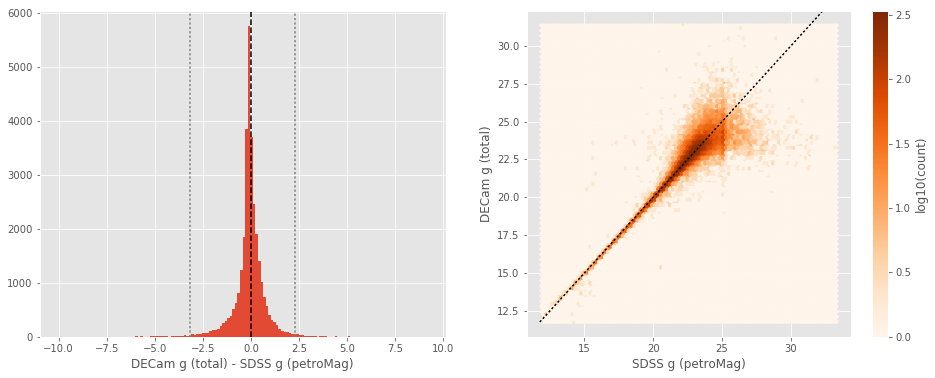

GPC1 g (aperture) - SDSS g (fiberMag):
- Median: -0.57
- Median Absolute Deviation: 0.26
- 1% percentile: -2.7370841979980467
- 99% percentile: 1.55568389892579


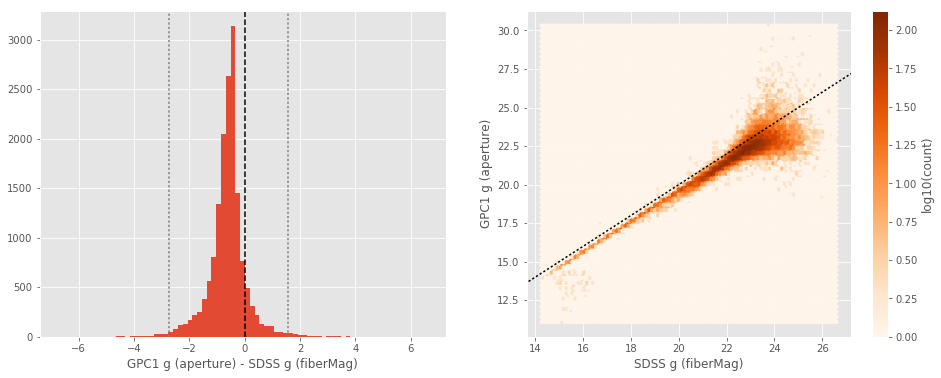

GPC1 g (total) - SDSS g (petroMag):
- Median: -0.11
- Median Absolute Deviation: 0.30
- 1% percentile: -4.182919197082519
- 99% percentile: 1.6299779701232904


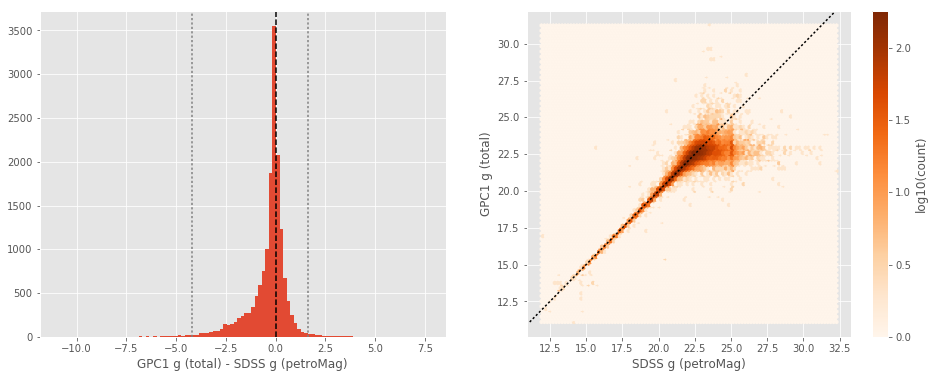

No sources have both SDSS g (fiberMag) and Suprime g (aperture) values.
No sources have both SDSS g (petroMag) and Suprime g (total) values.
No sources have both SDSS g (fiberMag) and RCS g (aperture) values.
No sources have both SDSS g (petroMag) and RCS g (total) values.
SDSS r (aperture) - SDSS r (fiberMag):
- Median: 0.04
- Median Absolute Deviation: 0.07
- 1% percentile: -0.5309595489501953
- 99% percentile: 0.7582798767089833


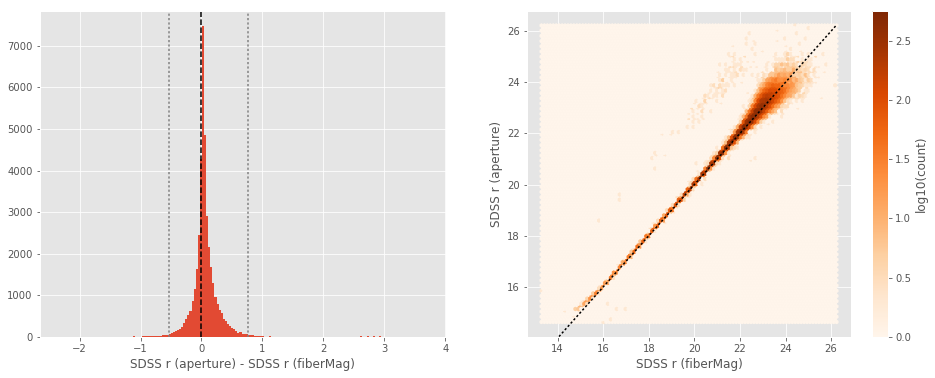

SDSS r (total) - SDSS r (petroMag):
- Median: -0.02
- Median Absolute Deviation: 0.15
- 1% percentile: -2.433763809204102
- 99% percentile: 1.598411407470702


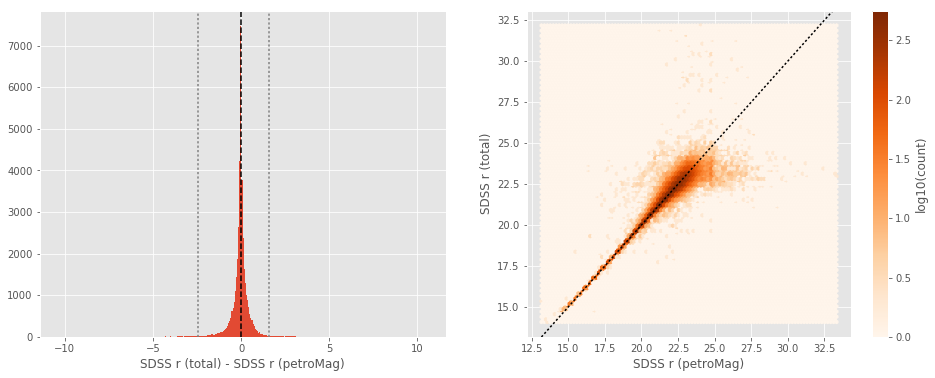

DECam r (aperture) - SDSS r (fiberMag):
- Median: -0.54
- Median Absolute Deviation: 0.13
- 1% percentile: -1.2641379165649413
- 99% percentile: 0.459795913696289


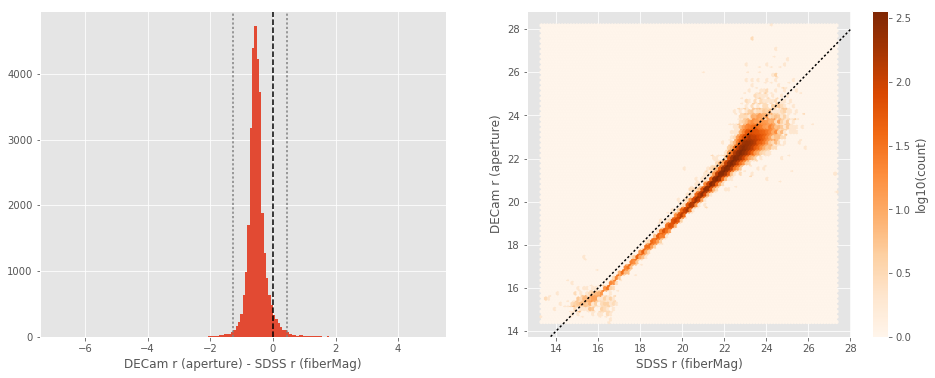

DECam r (total) - SDSS r (petroMag):
- Median: -0.17
- Median Absolute Deviation: 0.18
- 1% percentile: -2.924261474609375
- 99% percentile: 1.1507049560546867


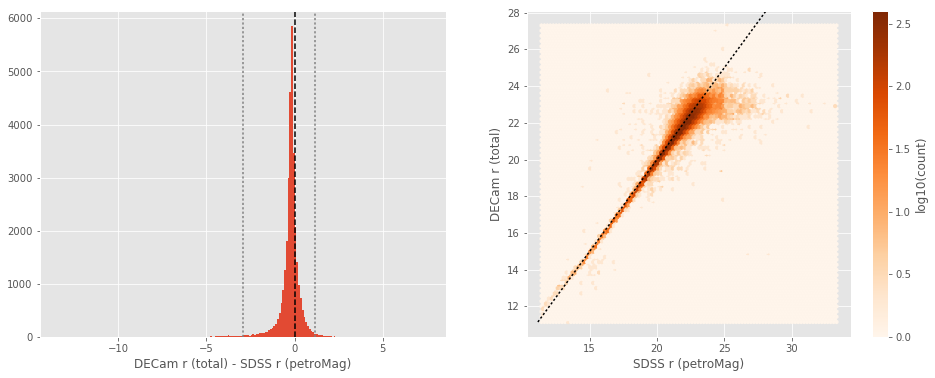

GPC1 r (aperture) - SDSS r (fiberMag):
- Median: -0.39
- Median Absolute Deviation: 0.16
- 1% percentile: -1.788167610168457
- 99% percentile: 0.8968697738647486


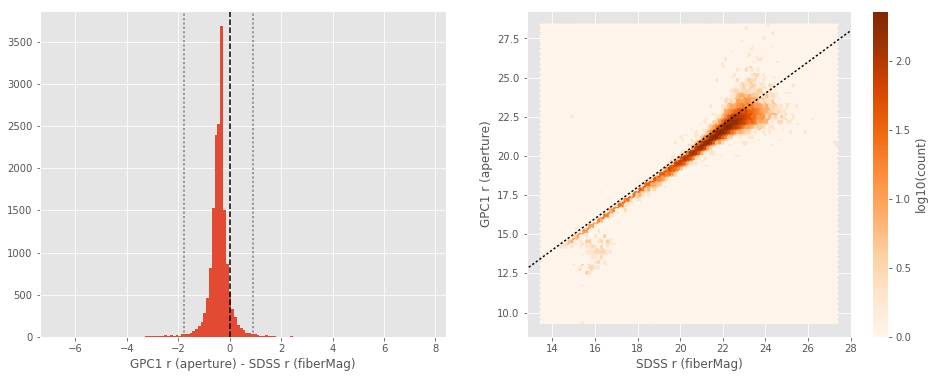

GPC1 r (total) - SDSS r (petroMag):
- Median: 0.06
- Median Absolute Deviation: 0.17
- 1% percentile: -2.4993887329101563
- 99% percentile: 1.313994140624997


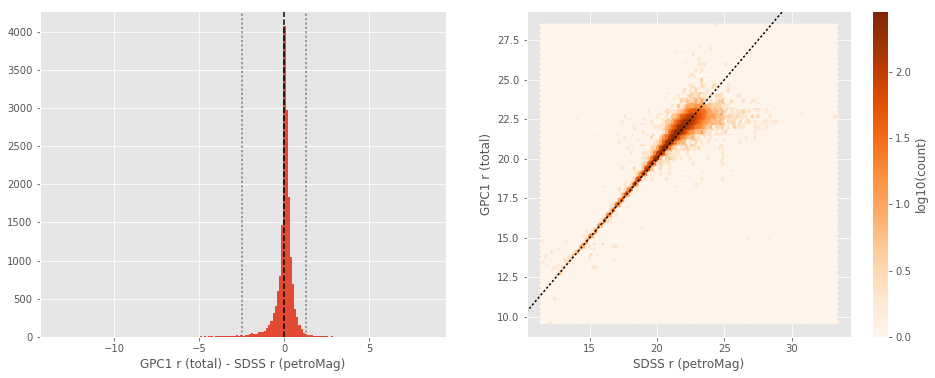

No sources have both SDSS r (fiberMag) and Suprime r (aperture) values.
No sources have both SDSS r (petroMag) and Suprime r (total) values.
No sources have both SDSS r (fiberMag) and RCS r (aperture) values.
No sources have both SDSS r (petroMag) and RCS r (total) values.
SDSS i (aperture) - SDSS i (fiberMag):
- Median: 0.03
- Median Absolute Deviation: 0.06
- 1% percentile: -0.5296745300292969
- 99% percentile: 0.7089859771728512


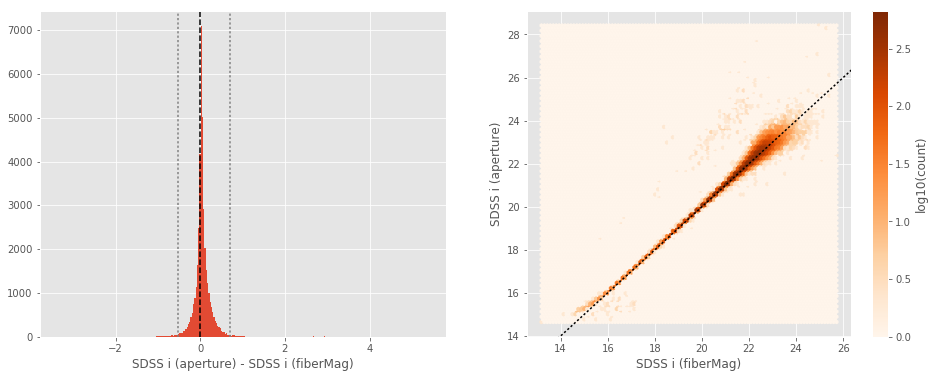

SDSS i (total) - SDSS i (petroMag):
- Median: -0.01
- Median Absolute Deviation: 0.14
- 1% percentile: -2.7627696990966797
- 99% percentile: 2.000313949584948


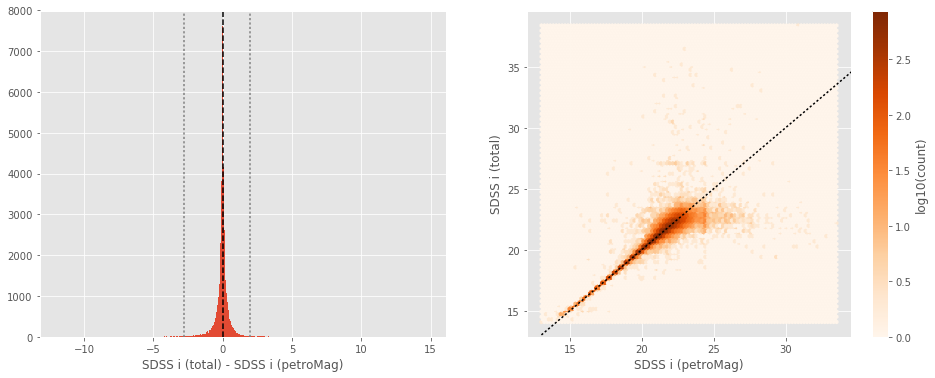

GPC1 i (aperture) - SDSS i (fiberMag):
- Median: -0.37
- Median Absolute Deviation: 0.10
- 1% percentile: -1.1159503269195556
- 99% percentile: 0.28435298919677715


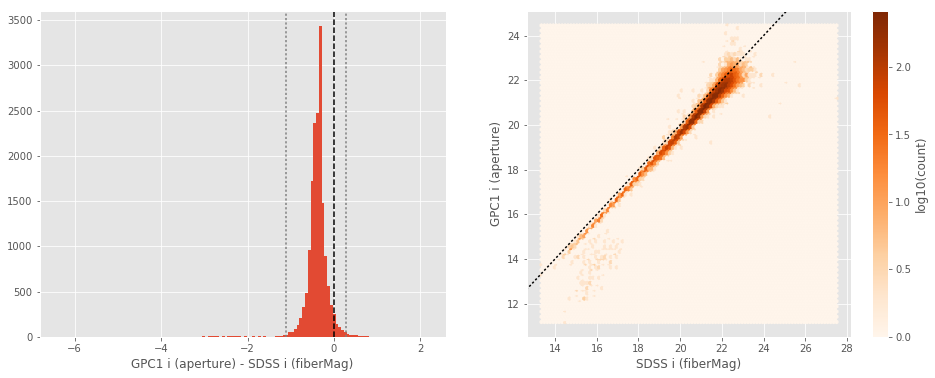

GPC1 i (total) - SDSS i (petroMag):
- Median: 0.07
- Median Absolute Deviation: 0.13
- 1% percentile: -2.2654150772094725
- 99% percentile: 1.047493133544923


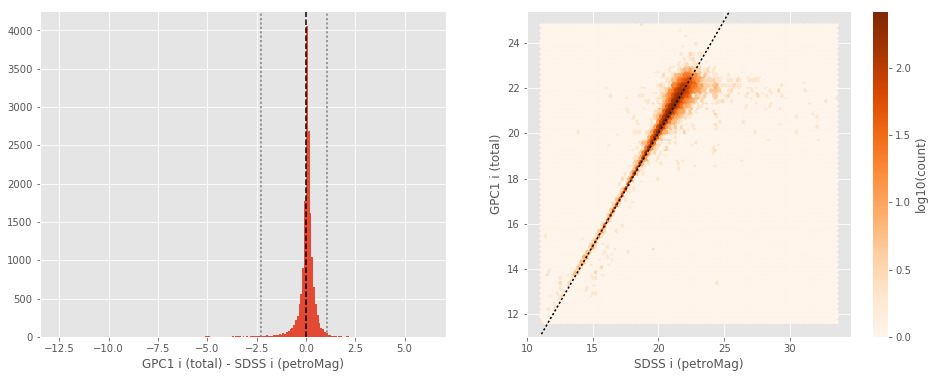

No sources have both SDSS i (fiberMag) and Suprime i (aperture) values.
No sources have both SDSS i (petroMag) and Suprime i (total) values.
No sources have both SDSS i (fiberMag) and RCS i (aperture) values.
No sources have both SDSS i (petroMag) and RCS i (total) values.
SDSS z (aperture) - SDSS z (fiberMag):
- Median: 0.08
- Median Absolute Deviation: 0.16
- 1% percentile: -0.8286537933349609
- 99% percentile: 1.7714430236816394


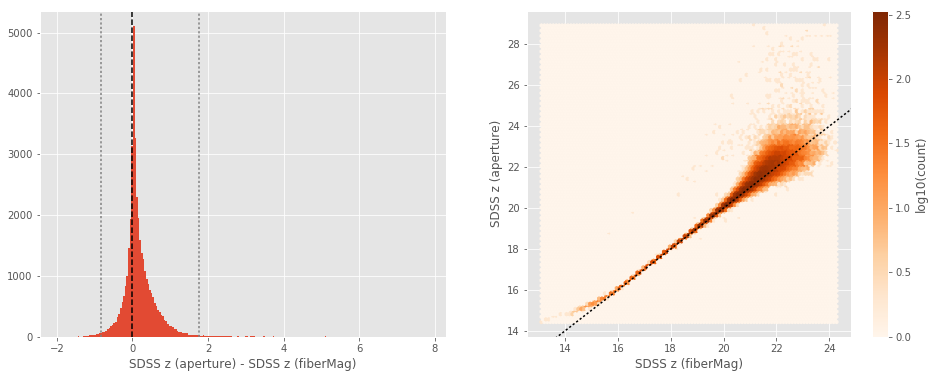

SDSS z (total) - SDSS z (petroMag):
- Median: 0.01
- Median Absolute Deviation: 0.34
- 1% percentile: -3.411112594604492
- 99% percentile: 6.094700088500874


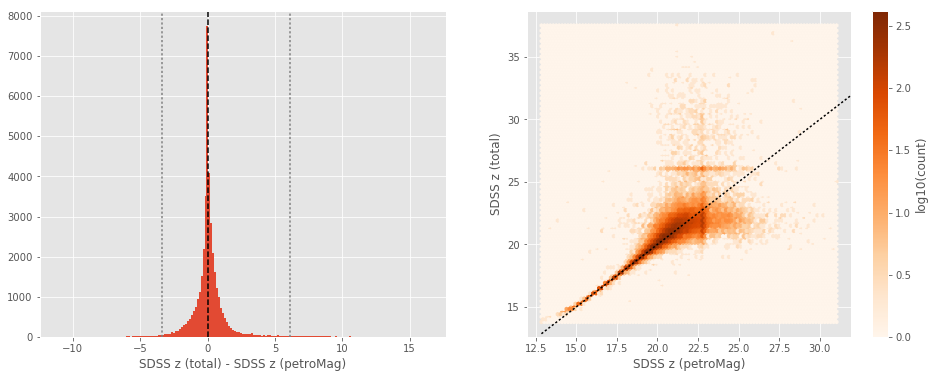

DECam z (aperture) - SDSS z (fiberMag):
- Median: -0.36
- Median Absolute Deviation: 0.20
- 1% percentile: -1.4081120109558105
- 99% percentile: 1.5516875076293954


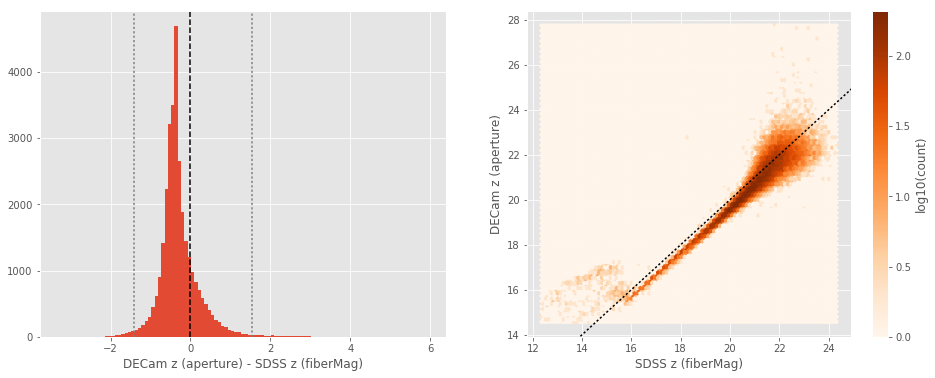

DECam z (total) - SDSS z (petroMag):
- Median: -0.13
- Median Absolute Deviation: 0.34
- 1% percentile: -3.834573860168457
- 99% percentile: 1.902737655639648


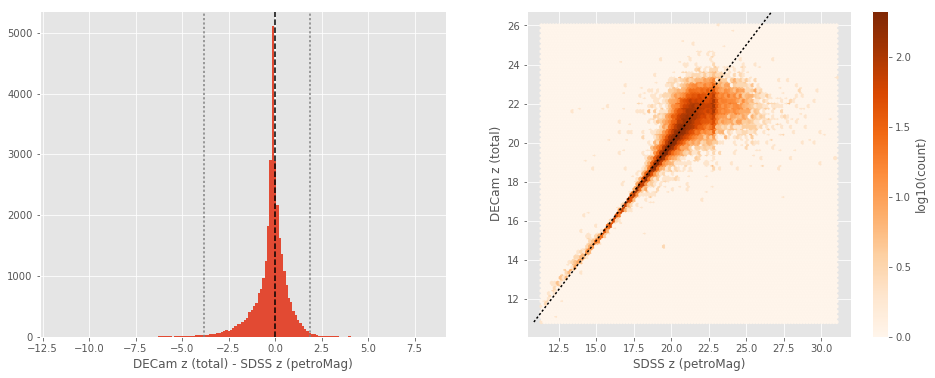

GPC1 z (aperture) - SDSS z (fiberMag):
- Median: -0.29
- Median Absolute Deviation: 0.19
- 1% percentile: -1.4940897369384767
- 99% percentile: 1.2194717025756812


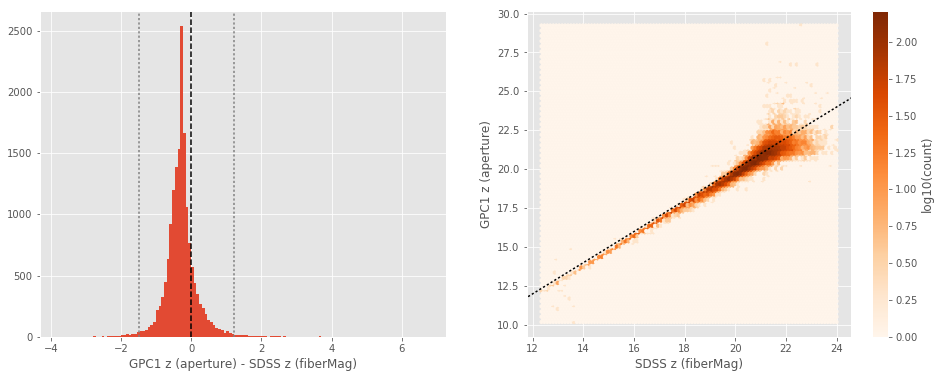

GPC1 z (total) - SDSS z (petroMag):
- Median: 0.12
- Median Absolute Deviation: 0.28
- 1% percentile: -3.687384223937988
- 99% percentile: 1.7578128814697207


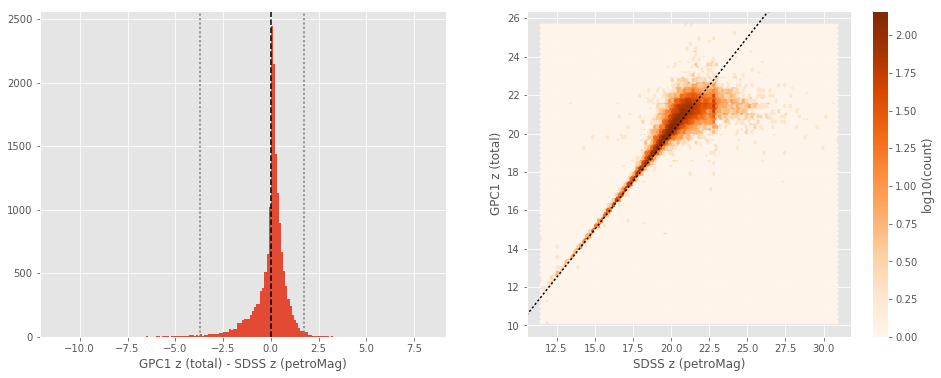

No sources have both SDSS z (fiberMag) and Suprime z (aperture) values.
No sources have both SDSS z (petroMag) and Suprime z (total) values.
No sources have both SDSS z (fiberMag) and RCS z (aperture) values.
No sources have both SDSS z (petroMag) and RCS z (total) values.


In [32]:

for band_of_a_kind in [u_bands, g_bands, r_bands, i_bands, z_bands]:
    for band in band_of_a_kind:
        
        sdss_mag_ap_colname = "fiberMag_{}".format(band[-1])
        sdss_mag_tot_colname = "petroMag_{}".format(band[-1])
        master_cat_mag_ap_colname = "m_ap_{}".format(band.replace(" ", "_").lower())
        master_cat_mag_tot_colname = "m_{}".format(band.replace(" ", "_").lower())
        
        # Set SDSS magnitudes to NaN when the magnitude  is negative as SDSS uses large
        # negative numbers for missing magnitudes
        sdss[sdss_mag_ap_colname][sdss[sdss_mag_ap_colname] < 0.] = np.nan
        sdss[sdss_mag_tot_colname][sdss[sdss_mag_tot_colname] < 0.] = np.nan
  

        sdss_mag_ap = sdss[sdss_mag_ap_colname]
        master_cat_mag_ap = master_catalogue[master_cat_mag_ap_colname][ml_sdss_idx]
    
        nb_compare_mags(sdss_mag_ap, master_cat_mag_ap,
                            labels=("SDSS (Main survey DR13) {} (fiberMag)".format(band[-1]), "{} (aperture)".format(band)))
    
        sdss_mag_tot = sdss[sdss_mag_tot_colname]
        master_cat_mag_tot = master_catalogue[master_cat_mag_tot_colname][ml_sdss_idx]
        
        nb_compare_mags(sdss_mag_tot, master_cat_mag_tot,
                        labels=("SDSS (Main survey DR13) {} (petroMag)".format(band[-1]), "{} (total)".format(band)))

### III.b - Comparing J and K bands to 2MASS

The catalogue is cross-matched to 2MASS-PSC withing 0.2 arcsecond. 

We compare the UKIDSS total J and K magnitudes to those from 2MASS.

In [34]:
twomass = Table.read("../../dmu0/dmu0_2MASS-point-sources/data/2MASS-PSC_Herschel-Stripe-82.fits")
twomass_coords = SkyCoord(twomass['raj2000'], twomass['dej2000'])

idx, d2d, _ = twomass_coords.match_to_catalog_sky(master_catalogue_coords)
mask = (d2d < 0.2 * u.arcsec)

twomass = twomass[mask]
ml_twomass_idx = idx[mask]

UKIDSS LAS J (total) - 2MASS J:
- Median: 0.95
- Median Absolute Deviation: 0.05
- 1% percentile: 0.22668508148193361
- 99% percentile: 1.5051213706970208


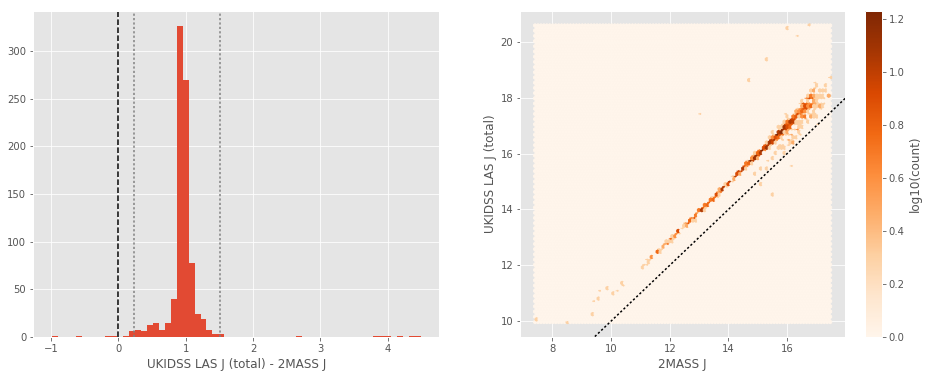

In [35]:
nb_compare_mags(twomass['jmag'], master_catalogue['m_ukidss_j'][ml_twomass_idx],
                labels=("2MASS J", "UKIDSS LAS J (total)"))

UKIDSS LAS K (total) - 2MASS K:
- Median: 1.96
- Median Absolute Deviation: 0.07
- 1% percentile: 1.1564134338378909
- 99% percentile: 2.7117678466796864


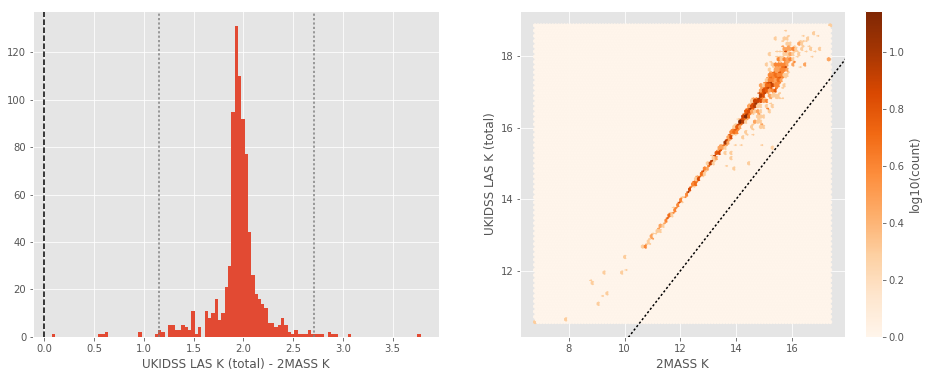

In [36]:
nb_compare_mags(twomass['kmag'], master_catalogue['m_ukidss_k'][ml_twomass_idx],
                labels=("2MASS K", "UKIDSS LAS K (total)"))

## IV - Comparing aperture magnitudes to total ones.

In [37]:
nb_ccplots(
    master_catalogue['m_rcs_r'],
    master_catalogue['m_ap_rcs_r'] - master_catalogue['m_rcs_r'],
    "r total magnitude (CFHT)", "r aperture mag - total mag (CFHT)",
    master_catalogue["stellarity"],
    invert_x=True
)

Number of source used: 0 / 1149870 (0.00%)
HELP warning: no sources with observations in both bands


## V - Color-color and magnitude-color plots

In [38]:
nb_ccplots(
    master_catalogue['m_gpc1_g'] - master_catalogue['m_gpc1_i'],
    master_catalogue['m_ukidss_j'] - master_catalogue['m_ukidss_k'],
    "g - i (PanSTARRS)", "J - K (UKIDSS LAS)",
    master_catalogue["stellarity"]
)

Number of source used: 0 / 1149870 (0.00%)
HELP warning: no sources with observations in both bands


In [39]:
nb_ccplots(
    master_catalogue['m_gpc1_i'] - master_catalogue['m_irac_i1'],
    master_catalogue['m_gpc1_g'] - master_catalogue['m_gpc1_i'],
    "PanSTARRS i - IRAC1", "g - i (PanSTARRS)",
    master_catalogue["stellarity"]
)

Number of source used: 0 / 1149870 (0.00%)
HELP warning: no sources with observations in both bands


In [40]:
nb_ccplots(
    master_catalogue['m_rcs_g'] - master_catalogue['m_rcs_i'],
    master_catalogue['m_rcs_r'] - master_catalogue['m_rcs_y'],
    "g - i (CFHT)", "r - y (CFHT)",
    master_catalogue["stellarity"]
)

Number of source used: 0 / 1149870 (0.00%)
HELP warning: no sources with observations in both bands


In [41]:
nb_ccplots(
    master_catalogue['m_ukidss_j'] - master_catalogue['m_ukidss_k'],
    master_catalogue['m_gpc1_g'] - master_catalogue['m_ukidss_j'],
    "J - K (UKIDSS LAS)", "g - J (PanSTARRS, UKIDSS)",
    master_catalogue["stellarity"]
)

Number of source used: 0 / 1149870 (0.00%)
HELP warning: no sources with observations in both bands


In [42]:
nb_ccplots(
    master_catalogue['m_gpc1_i'] - master_catalogue['m_gpc1_z'],
    master_catalogue['m_gpc1_z'] - master_catalogue['m_ukidss_j'],
    "i - z (PanSTARRS)", "z - J (PanSTARRS, UKIDSS LAS)",
    master_catalogue["stellarity"]
)

Number of source used: 0 / 1149870 (0.00%)
HELP warning: no sources with observations in both bands


In [43]:
nb_ccplots(
    master_catalogue['m_gpc1_i'] - master_catalogue['m_gpc1_z'],
    master_catalogue['m_irac_i1'] - master_catalogue['m_irac_i2'],
    "i - z (PanSTARRS)", "IRAC1 - IRAC2",
    master_catalogue["stellarity"]
)

Number of source used: 0 / 1149870 (0.00%)
HELP warning: no sources with observations in both bands
